In [1]:
## Here we will create a multi classification model
### We will use Rock paper sicissior images and identify in the prediction
### These are CGI images. So we will train model.
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-06-07 16:17:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  65.5MB/s    in 2.9s    

2020-06-07 16:17:14 (65.5 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-06-07 16:17:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import zipfile

In [ ]:
zip_file=zipfile.ZipFile('/tmp/rps.zip')
zip_file.extractall('/tmp')
zip_file.close()

zip_file=zipfile.ZipFile('/tmp/rps-test-set.zip')
zip_file.extractall('/tmp')
zip_file.close()

In [ ]:
train_path=os.path.join('/tmp','rps')
test_path=os.path.join('/tmp','rps-test-set')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_gen=ImageDataGenerator(rescale=1/255.0,rotation_range=40, width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,fill_mode='nearest',
                             horizontal_flip=True)
train_data_gen=train_gen.flow_from_directory(train_path,target_size=(150,150),class_mode='categorical',shuffle=True,batch_size=20)

test_gen=ImageDataGenerator(rescale=1/255.0)
test_data_gen=test_gen.flow_from_directory(test_path,target_size=(150,150),class_mode='categorical',batch_size=20
                                           )

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
### Model Creation
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop

In [8]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='VALID',input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=512,activation=tf.nn.relu))
model.add(Dense(units=3,activation=tf.nn.softmax))
rms=RMSprop(learning_rate=1e-4)
model.compile(optimizer=rms,loss=keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 128)       0

In [12]:
history=model.fit(train_data_gen,epochs=25,steps_per_epoch=126,validation_data=(test_data_gen),validation_steps=18)

Epoch 1/25
126/126 [==============================] - 25s 199ms/step - loss: 0.5602 - accuracy: 0.7671 - val_loss: 0.3412 - val_accuracy: 0.8917
Epoch 2/25
126/126 [==============================] - 25s 200ms/step - loss: 0.4538 - accuracy: 0.8183 - val_loss: 0.3841 - val_accuracy: 0.7444
Epoch 3/25
126/126 [==============================] - 25s 201ms/step - loss: 0.4078 - accuracy: 0.8448 - val_loss: 0.1616 - val_accuracy: 0.9722
Epoch 4/25
126/126 [==============================] - 25s 199ms/step - loss: 0.3458 - accuracy: 0.8738 - val_loss: 0.2114 - val_accuracy: 0.9306
Epoch 5/25
126/126 [==============================] - 25s 200ms/step - loss: 0.3025 - accuracy: 0.8909 - val_loss: 0.1187 - val_accuracy: 0.9667
Epoch 6/25
126/126 [==============================] - 25s 200ms/step - loss: 0.2850 - accuracy: 0.8984 - val_loss: 0.1069 - val_accuracy: 0.9750
Epoch 7/25
126/126 [==============================] - 25s 199ms/step - loss: 0.2504 - accuracy: 0.9111 - val_loss: 0.1829 - val_ac

In [ ]:
metrics=history.history
loss=metrics['loss']
val_loss=metrics['val_loss']
acc=metrics['accuracy']
val_acc=metrics['val_accuracy']

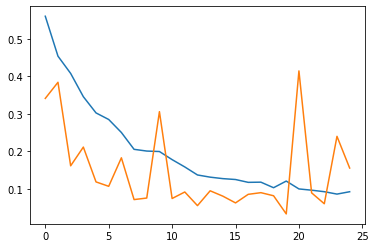

In [14]:
plt.plot(loss)
plt.plot(val_loss)

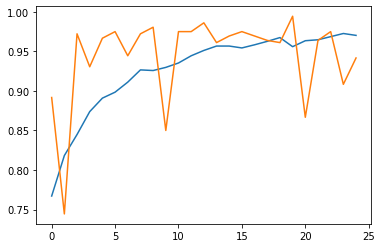

In [15]:
plt.plot(acc)
plt.plot(val_acc)

In [16]:
##visulize data
layers=[layers for layer in model.layers]

NameError: ignored